# Deep Learning CIFAR-10 (with dropout, batch normalization and data augmentation)

## 1. Loading the dataset

In [1]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#### Examining the dataset

In [2]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


We have 50000 training and 10000 test images in the dataset. The images have a structure of (32,32,3) which correspond to (width, height, RGB).

For each image there is a corresponding label, which is a class index.

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


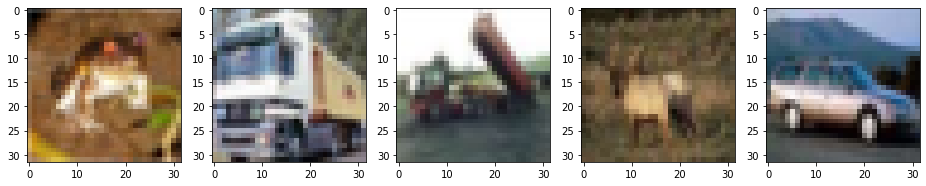

In [3]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

## 2. CNN classifier

#### Preparing the dataset

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


#### Creating CNN model

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True)   # flip images horizontally

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train[:40000], y_train[:40000], batch_size=32)
validation_generator = validation_datagen.flow(X_train[40000:], y_train[40000:], batch_size=32)

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3)))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
# Batch normalization layer added here
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

adam = Adam(learning_rate=0.0006, beta_1=0.9, beta_2=0.999, decay=0.0)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0

In [10]:
# fits the model on batches with real-time data augmentation:
history = model.fit(train_generator,    
                    validation_data=validation_generator,
                    validation_steps=len(X_train[40000:]) / 32,
                    steps_per_epoch=len(X_train[:40000]) / 32,
                    epochs=15,
                    verbose=2)

Epoch 1/15
1250/1250 - 31s - loss: 1.6274 - accuracy: 0.4265 - val_loss: 1.2713 - val_accuracy: 0.5517 - 31s/epoch - 24ms/step
Epoch 2/15
1250/1250 - 28s - loss: 1.2830 - accuracy: 0.5408 - val_loss: 1.1109 - val_accuracy: 0.6044 - 28s/epoch - 23ms/step
Epoch 3/15
1250/1250 - 28s - loss: 1.1912 - accuracy: 0.5767 - val_loss: 1.1599 - val_accuracy: 0.5883 - 28s/epoch - 22ms/step
Epoch 4/15
1250/1250 - 28s - loss: 1.1418 - accuracy: 0.5958 - val_loss: 1.0064 - val_accuracy: 0.6464 - 28s/epoch - 23ms/step
Epoch 5/15
1250/1250 - 28s - loss: 1.1002 - accuracy: 0.6121 - val_loss: 0.9450 - val_accuracy: 0.6727 - 28s/epoch - 22ms/step
Epoch 6/15
1250/1250 - 28s - loss: 1.0706 - accuracy: 0.6239 - val_loss: 1.0560 - val_accuracy: 0.6274 - 28s/epoch - 22ms/step
Epoch 7/15
1250/1250 - 28s - loss: 1.0475 - accuracy: 0.6339 - val_loss: 0.9741 - val_accuracy: 0.6576 - 28s/epoch - 23ms/step
Epoch 8/15
1250/1250 - 29s - loss: 1.0166 - accuracy: 0.6411 - val_loss: 0.9854 - val_accuracy: 0.6590 - 29s/ep

In [ ]:
# Define plotLosses(history) function:

In [ ]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

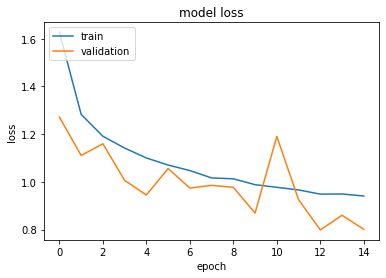

In [11]:
plotLosses(history)

#### Evaluating the CNN (with dropout, batch normalization and data augmentation)

In [12]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [13]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.8062433004379272, 0.7240999937057495]
